In [1]:
from io import open
import os,string,random,time,math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks",context="talk")
plt.style.use("dark_background")
import numpy as np


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
device_gpu=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
device_gpu

device(type='cuda', index=0)

# Dataset

## Preprocesing

In [6]:
languages=[]
data=[]
X=[]
y=[]
with open('name2lang.txt','r') as f:
    for line in f:
        line=line.split(',')
        name=line[0].strip()
        lang=line[1].strip()
        if not lang in languages:
            languages.append(lang)
            
        X.append(name)
        y.append(lang)
        data.append((name,lang))
        

In [7]:
n_languages=len(languages)

In [8]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


In [9]:
print(data[0:10])

[('Abreu', 'Portuguese'), ('Albuquerque', 'Portuguese'), ('Almeida', 'Portuguese'), ('Alves', 'Portuguese'), ('Araujo', 'Portuguese'), ('Araullo', 'Portuguese'), ('Barros', 'Portuguese'), ('Basurto', 'Portuguese'), ('Belo', 'Portuguese'), ('Cabral', 'Portuguese')]


 ## Train Test Split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
print(X_train)

['Babenchikoff', 'Palmer', 'Dogilev', 'Morandi', 'Kucharova', 'Babadjanoff', 'Beloenko', 'Fomintsev', 'Exton', 'Gerges', 'Pats', 'Lysykh', 'Bazzi', "D'cruze", 'Baz', 'Shening', 'Chepin', 'Guzev', 'Eroshin', 'Ogtrop', 'Oxtoby', 'Ado', 'Flowers', 'Welsh', 'Chernov', 'Jamilov', 'Mizumaki', 'Chavez', 'Nazari', 'Sam', 'Schenk', 'Caro', 'Pribylovsky', 'Ewles', 'Baistryutchenko', 'Oliver', 'Hout', 'Kihara', 'Zogby', 'Ryzhikh', 'Norgate', 'Guo', 'Ho', 'Westerberg', 'Busby', 'Redin', 'Leiferkus', 'Salvage', 'Vanyushin', 'Cathain', 'Bazil', 'Trevor', 'Getmanenko', 'Truchanow', 'Hanania', 'Talanov', 'Tobulinsky', 'Maalouf', 'Omashev', 'Halstead', 'Cai', 'Gottlieb', 'Lang', 'Braune', 'Hrabak', 'East', 'Bahar', 'Jebelev', 'Pavlunovsky', 'Yakub', 'Assaf', 'Stumpf', 'Rowland', 'Turbanov', 'Ashwell', 'Suarez', 'Durr', 'Turlapov', 'Mudra', 'Gensai', 'Zhidilev', 'Couch', 'Agamoff', 'Gulyaev', 'BestuzhevRyumin', 'Dunnett', 'Muzrukov', 'Macpherson', 'Opayne', 'Suenami', 'Ayton', 'Wetterman', 'Eigin', 'Sim

In [12]:
print(len(X_train),len(X_test))

16040 4010


## Encoding names and languages

In [13]:
all_letters=string.ascii_letters+".,;"

In [14]:
n_letters=len(all_letters)

In [15]:
def name_rep(name):
    rep=torch.zeros(len(name),1,n_letters)
    for index,letter in enumerate(name):
        pos=all_letters.find(letter)
        rep[index][0][pos]=1
    return rep

In [16]:
def lang_rep(lang):
    return torch.tensor([languages.index(lang)],dtype=torch.long)

In [17]:
name_rep('Muneeb')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [18]:
lang_rep('Portuguese')

tensor([0])

In [19]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


## Basic Visualisation

In [20]:
count={}

for l in languages:
    count[l]=0
    
for d in data:
    count[d[1]]+=1

In [21]:
print(count)

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


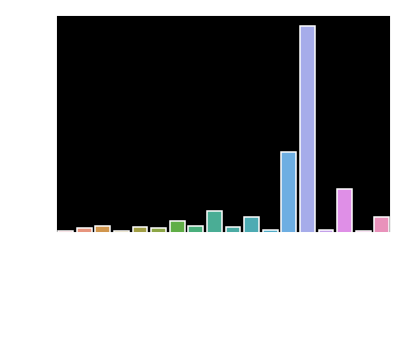

In [22]:
plt_=sns.barplot(list(count.keys()),list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(),rotation=90)
plt.show()

# Basic network and testing inference

In [23]:
class RNN_net(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        
        super(RNN_net,self).__init__()
        self.hidden_size=hidden_size
        self.rnn_cell=nn.RNN(input_size,hidden_size)
        self.h2o=nn.Linear(hidden_size,output_size)
        self.softmax=nn.LogSoftmax(dim=1)
        
    def forward(self,input_,hidden=None,batch_size=1):
        #print(hidden)
        out,hidden=self.rnn_cell(input_,hidden)
        output=self.h2o(hidden.view(-1,self.hidden_size))
        output=self.softmax(output)
        return output,hidden
    
    def init_hidden(self,batch_size=1):
        return torch.zeros(1,batch_size,self.hidden_size)

In [24]:
n_hidden=128
net=RNN_net(n_letters,n_hidden,n_languages)

In [25]:
def infer(net,name,device='cpu'):
    name_ohe=name_rep(name).to(device)
    output,hidden=net(name_ohe)
    if type(hidden) is tuple:
        hidden=hidden[0]
    index=torch.argmax(hidden)
    
    return output

In [26]:
infer(net,'Adam')

tensor([[-3.0233, -2.8926, -2.8682, -2.8492, -2.8404, -2.9365, -2.9635, -2.8407,
         -2.7832, -2.9204, -2.9121, -2.8797, -2.8953, -2.8747, -2.8867, -3.0692,
         -2.7908, -2.8440]], grad_fn=<LogSoftmaxBackward>)

# Evaluate Model

In [27]:
def dataloader(npoints,X_,y_):
    to_ret=[]
    for i in range(npoints):
        index_=np.random.randint(len(X_))
        name,lang=X_[index_],y_[index_]
        to_ret.append((name,lang,name_rep(name),lang_rep(lang)))
    return to_ret

In [28]:
dataloader(2,X_train,y_train)

[('Hamada',
  'Japanese',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0.]],
  
          [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0.]],
  
          [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [29]:
def eval(net,n_points,topk,X_,y_,device='cpu'):
    net=net.eval().to(device)
    data_=dataloader(n_points,X_,y_)
    correct=0
    
    for name,language,name_ohe,lang_rep in data_:
        
        output=infer(net,name,device)
        val,indices=output.topk(topk)
        indices=indices.to('cpu')
        
        if lang_rep in indices:
            correct+=1
            
    accuracy=correct/n_points
    return accuracy
        

In [30]:
eval(net,1000,3,X_test,y_test)

0.075

# Batching

In [31]:
def batched_name_rep(names,max_word_size):
    
    rep=torch.zeros(max_word_size,len(names),n_letters)
    
    for name_index,name in enumerate(names):
        for letter_index,letter in enumerate(name):
            pos=all_letters.find(letter)
            rep[letter_index][name_index][pos]=1
    return rep

In [32]:
def print_char(name_reps):
    name_reps=name_reps.view((-1,name_reps.size()[-1]))
    for t in name_reps:
        if torch.sum(t)==0:
            print('<pad>')
        else:
            index=t.argmax()
            print(all_letters[index])

In [33]:
out_=batched_name_rep(['Shyam','Ram'],5)

In [34]:
print(out_)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [35]:
print(out_.shape)

torch.Size([5, 2, 55])


In [36]:
print_char(out_)

S
R
h
a
y
m
a
<pad>
m
<pad>


In [37]:
def batched_lang_rep(langs):
    rep=torch.zeros([len(langs)],dtype=torch.long)
    for index,lang in enumerate(langs):
        rep[index]=languages.index(lang)
    return rep

In [72]:
def batched_dataloader(npoints,X_,y_,verbose=False,device='cpu'):
    names=[]
    langs=[]
    X_lengths=[]
    
    for i in range(npoints):
        index_=np.random.randint(len(X_))
        name,lang=X_[index_],y_[index_]
        X_lengths.append(len(name))
        names.append(name)
        langs.append(lang)
    max_length=max(X_lengths)
    
    names_rep=batched_name_rep(names,max_length).to(device)
    langs_rep=batched_lang_rep(langs).to(device)
    
    padded_names_rep=torch.nn.utils.rnn.pack_padded_sequence(names_rep,X_lengths,enforce_sorted=False)
    
    if verbose:
        print(names_rep.shape,padded_names_rep.data.shape)
        print('---')
        
    if verbose:
        print(names)
        print_char(names_rep)
        print('---')
        
    if verbose:
        print_char(padded_names_rep.data)
        print('LANG REP ',langs_rep.data)
        print('Batch sizes',padded_names_rep.batch_sizes)
        
    return padded_names_rep.to(device),langs_rep

In [74]:
p,l=batched_dataloader(3,X_train,y_train,False)

# Training

## Basic training

In [45]:
def train(net,opt,criterion,n_points):
    
    opt.zero_grad()
    total_loss=0
    
    data_=dataloader(n_points,X_train,y_train)
    
    total_loss=0
    
    for name,language,name_ohe,lang_rep in data_:
        
        hidden=net.init_hidden()
        
        for i in range(name_ohe.size()[0]):
            output,hidden=net(name_ohe[i:i+1],hidden)
            
        loss=criterion(output,lang_rep)
        loss.backward(retain_graph=True)
        
        total_loss+=loss
    opt.step()
    
    return total_loss/n_points

In [75]:
def train_batch(net,opt,criterion,n_points,device='cpu'):
    
    net.train().to(device)
    opt.zero_grad()
    
    batch_input,batch_groundtruth=batched_dataloader(n_points,X_train,y_train,False,device)
    output,hidden=net(batch_input)
    
    loss=criterion(output,batch_groundtruth)
    
    loss.backward()
    opt.step()
    return loss

In [47]:
net=RNN_net(n_letters,n_hidden,n_languages)
criterion=nn.NLLLoss()
opt=optim.SGD(net.parameters(),lr=0.01,momentum=0.9)

In [49]:
%%time
train(net,opt,criterion,256)

CPU times: user 4.2 s, sys: 132 ms, total: 4.33 s
Wall time: 409 ms


tensor(1.9480, grad_fn=<DivBackward0>)

In [50]:
net=RNN_net(n_letters,n_hidden,n_languages)
criterion=nn.NLLLoss()
opt=optim.SGD(net.parameters(),lr=0.01,momentum=0.9)

In [52]:
%%time
train_batch(net,opt,criterion,256)

CPU times: user 72.1 ms, sys: 51.2 ms, total: 123 ms
Wall time: 23.6 ms


tensor(2.8858, grad_fn=<NllLossBackward>)

# Full training setup

In [67]:
def train_setup(net,lr=0.01,n_batches=100,batch_size=10,momentum=0.9,display_freq=5,device='cpu'):
    net=net.to(device)
    criterion=nn.NLLLoss()
    opt=optim.SGD(net.parameters(),lr=lr,momentum=momentum)
    
    loss_arr=np.zeros(n_batches+1)
    
    for i in range(n_batches):
        
        loss_arr[i+1]=(loss_arr[i]*i+train_batch(net,opt,criterion,batch_size,device))/(i+1)
        
        if i%display_freq==display_freq-1:
            
            print("Iteration ",i,' Loss ',loss_arr[i])
            plt.figure()
            plt.plot(loss_arr[1:i],'-*')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()
            print('\n\n')
            
    print('Top-1:', eval(net, len(X_test), 1, X_test, y_test, device), 'Top-2:', eval(net, len(X_test), 2, X_test, y_test, device))        

Iteration  499  Loss  0.9185557961463928


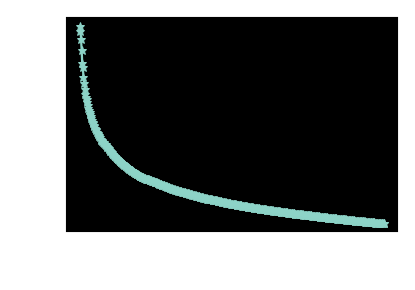




Iteration  999  Loss  0.7033195495605469


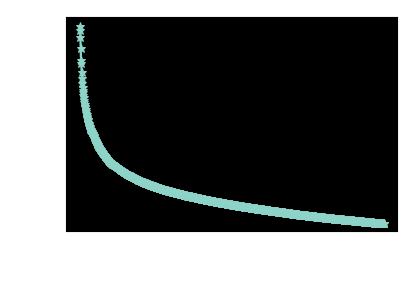




Iteration  1499  Loss  0.5821380615234375


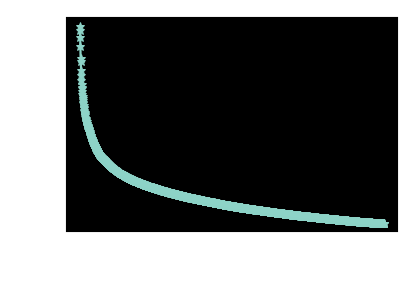




Iteration  1999  Loss  0.5140753984451294


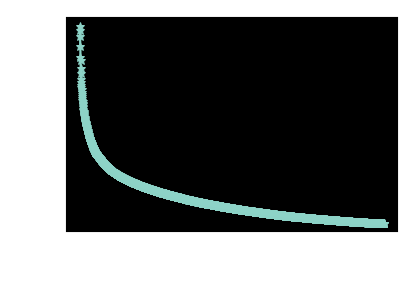




Top-1: 0.785785536159601 Top-2: 0.8768079800498753
CPU times: user 4min 43s, sys: 2min 22s, total: 7min 6s
Wall time: 1min 11s


In [77]:
%%time
net=RNN_net(n_letters,128,n_languages)
train_setup(net,lr=0.15,n_batches=2000,batch_size=512,display_freq=500)

# LSTM cell

In [78]:
class LSTM_net(nn.Module):
    
    def __init__(self,input_size,hidden_size,output_size):
        
        super(LSTM_net,self).__init__()
        self.hidden_size=hidden_size
        self.lstm_cell=nn.LSTM(input_size,hidden_size)
        self.h2o=nn.Linear(hidden_size,output_size)
        self.softmax=nn.LogSoftmax(dim=1)
        
    def forward(self,input_,hidden=None):
        out,hidden=self.lstm_cell(input_,hidden)
        output=self.h2o(hidden[0].view(-1,self.hidden_size))
        output=self.softmax(output)
        return output,hidden
    
    def init_hidden(self,batch_size=1):
        return (torch.zeros(1,batch_size,self.hidden_size),torch.zeros(1,batch_size,self.hidden_size))

Iteration  999  Loss  0.9649853706359863


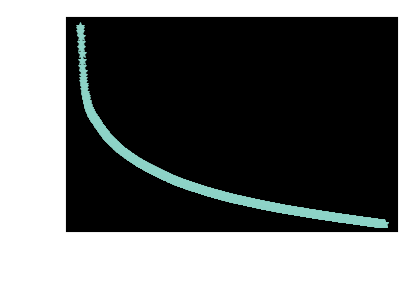




Iteration  1999  Loss  0.6997663378715515


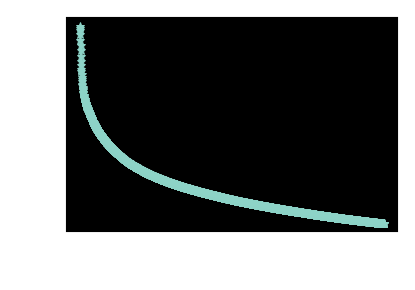




Iteration  2999  Loss  0.5358412265777588


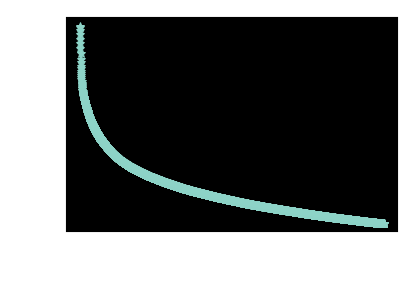




Iteration  3999  Loss  0.42961564660072327


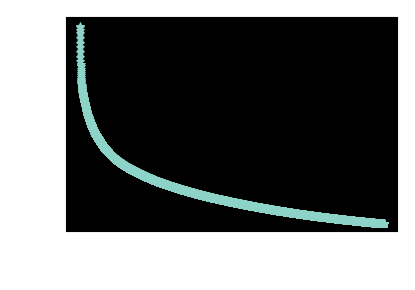




Iteration  4999  Loss  0.3596090078353882


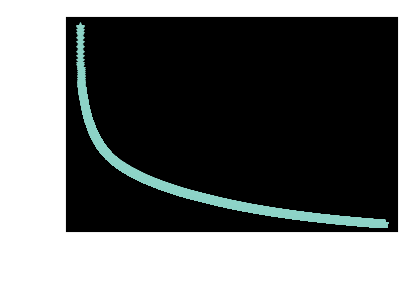




Iteration  5999  Loss  0.31063419580459595


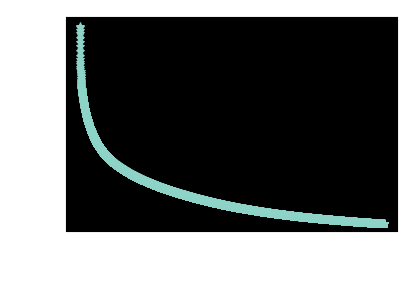




Iteration  6999  Loss  0.2746759355068207


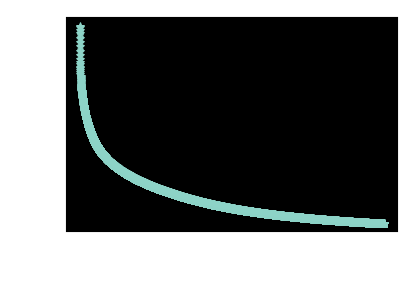




Iteration  7999  Loss  0.24725082516670227


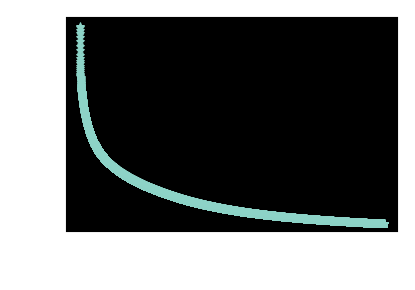




Top-1: 0.7793017456359103 Top-2: 0.8810473815461347


In [79]:
n_hidden=128
net=LSTM_net(n_letters,n_hidden,n_languages)
train_setup(net,lr=0.15,n_batches=8000,batch_size=512,display_freq=1000)


# GRU Cell

In [80]:
class GRU_net(nn.Module):
    
    def __init__(self,input_size,hidden_size,output_size):
        
        super(GRU_net,self).__init__()
        self.hidden_size=hidden_size
        self.gru_cell=nn.GRU(input_size,hidden_size)
        self.h2o=nn.Linear(hidden_size,output_size)
        self.softmax=nn.LogSoftmax(dim=1)
        
    def forward(self,input_,hidden=None):
        out,hidden=self.gru_cell(input_,hidden)
        output=self.h2o(hidden.view(-1,self.hidden_size))
        output=self.softmax(output)
        return output,hidden

Iteration  999  Loss  0.8863004446029663


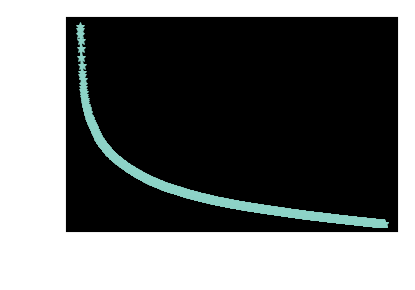




Iteration  1999  Loss  0.6448021531105042


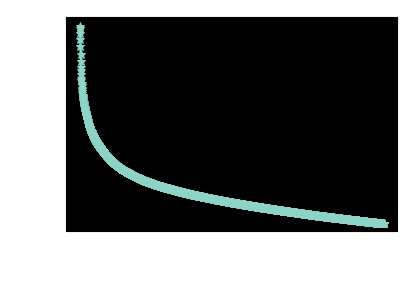




Iteration  2999  Loss  0.48339903354644775


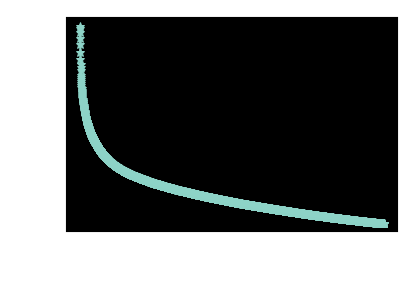




Iteration  3999  Loss  0.38317257165908813


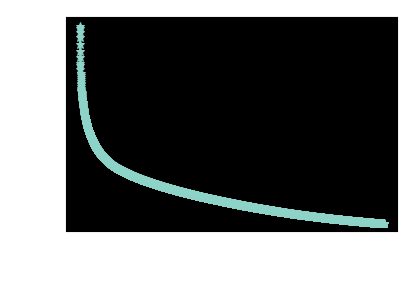




Iteration  4999  Loss  0.31971675157546997


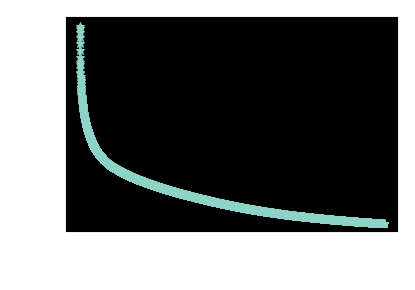




Iteration  5999  Loss  0.27618831396102905


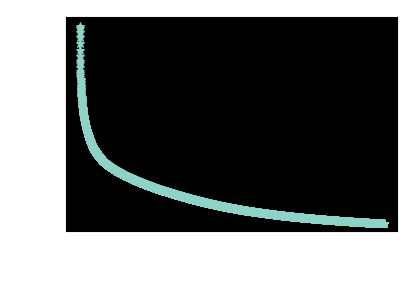




Iteration  6999  Loss  0.24451829493045807


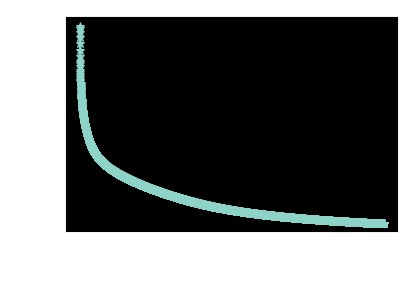




Iteration  7999  Loss  0.22049421072006226


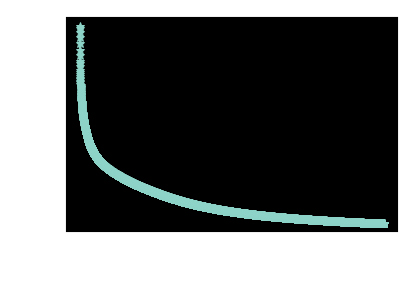




Top-1: 0.7892768079800498 Top-2: 0.886284289276808


In [81]:
n_hidden=128
net=GRU_net(n_letters,n_hidden,n_languages)
train_setup(net,lr=0.15,n_batches=8000,batch_size=512,display_freq=1000)